In [2]:
from db_utils import load_tender_records

df = load_tender_records(include_unlabelled=False)

df.head(10)

,id,title,resource_id,ca,info,published,deadline,procedure,status,pdf_url,awarddate,value,cycle,created_at,bid
0,1106,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),,2024-09-23,NaT,Qualification System,Established,,None,NaN,,2025-06-15 16:29:22.121977+00:00,0
1,2122,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,,2023-05-26,NaT,Dynamic Purchasing System,Established,,2023-05-01,0.0,,2025-06-15 16:30:18.875498+00:00,0
2,2085,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,,2023-06-07,NaT,Dynamic Purchasing System,Established,,2023-05-01,0.0,,2025-06-15 16:30:18.815448+00:00,0
3,1754,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),,2023-10-17,NaT,Dynamic Purchasing System,Established,,None,1000000.0,,2025-06-15 16:30:18.200632+00:00,0
4,1747,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),,2023-10-24,NaT,Dynamic Purchasing System,Established,,None,2000000.0,,2025-06-15 16:30:18.189296+00:00,0
5,568,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,,2025-05-28,2025-06-26 10:00:00,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,None,NaN,,2025-06-15 16:28:41.111051+00:00,1
6,987,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),,2024-12-18,NaT,Qualification System,Established,,None,NaN,,2025-06-15 16:29:02.044410+00:00,0
7,701,Painting Services,5721371,Children's Health Ireland (CHI),,2025-05-21,2025-06-27 10:00:00,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,None,1.0,,2025-06-15 16:28:51.700458+00:00,0
8,692,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,,2025-05-21,2025-06-30 15:00:00,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,None,200000.0,,2025-06-15 16:28:51.686173+00:00,0
9,943,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,,2025-02-12,2025-03-21 12:00:00,Open,Established,https://www.etenders.gov.ie/epps/cft/downloadN...,None,160000.0,,2025-06-15 16:29:01.944620+00:00,0


In [3]:
df = df.drop(columns=["published", "deadline", "awarddate", "created_at", "id"], errors="ignore")

Let's check what the info column is, as I don't even remember that

In [4]:

df["info"].notna().any() # true if at least something exists

np.True_

In [5]:
df["info"].dropna().unique()[:10]

array([''], dtype=object)

This means that the info column contains an empty string if it's not null so can also be dropped

In [6]:
df = df.drop(columns=["info"])

In [7]:
df.head(10)

,title,resource_id,ca,procedure,status,pdf_url,value,cycle,bid
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,Established,,NaN,,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,Established,,0.0,,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,Established,,0.0,,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,Established,,1000000.0,,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,Established,,2000000.0,,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,NaN,,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,Established,,NaN,,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,1.0,,0
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,Tender Submission,https://www.etenders.gov.ie/epps/cft/downloadN...,200000.0,,0
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,Established,https://www.etenders.gov.ie/epps/cft/downloadN...,160000.0,,0


let's also drop status column as that's no interest as to whether the tender could be bid on or not.

In [8]:
df = df.drop(columns=["status"])

Let's also make the same check for 'cycle' column

In [9]:
df["cycle"].dropna().unique()[:10]

array([''], dtype=object)

So that's also basically empty

In [10]:
df = df.drop(columns=["cycle"])

In [11]:
df.head(10)

,title,resource_id,ca,procedure,pdf_url,value,bid
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,,NaN,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,,0.0,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,,0.0,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,,1000000.0,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,,2000000.0,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,NaN,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,,NaN,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,https://www.etenders.gov.ie/epps/cft/downloadN...,1.0,0
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,200000.0,0
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,160000.0,0


All we can do with the pdf_url column at the momement is recognise whether one exists or not

In [12]:
df["has_pdf"] = df["pdf_url"].notna() & df["pdf_url"].str.strip().ne("")

However, this has turned it into true/false (boolean) so we need numeric values where 0 = false and 1 = true

In [13]:
df["has_pdf"] = df["has_pdf"].astype(int)

In [14]:
df.head(10)

,title,resource_id,ca,procedure,pdf_url,value,bid,has_pdf
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,,NaN,0,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,,0.0,0,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,,0.0,0,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,,1000000.0,0,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,,2000000.0,0,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,NaN,1,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,,NaN,0,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,https://www.etenders.gov.ie/epps/cft/downloadN...,1.0,0,1
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,200000.0,0,1
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,https://www.etenders.gov.ie/epps/cft/downloadN...,160000.0,0,1


Okay, that's 'possibly' useful but we can see that the value column is still a big mess. It contains Nan, 0 and values... 

In [15]:
df["value"].describe().astype(int)

count       1239
mean     1110858
std      1787407
min            0
25%       124000
50%       400000
75%      1000000
max      9900000
Name: value, dtype: int64

In [16]:
df["value"].isna().mean()

np.float64(0.40830945558739257)

40% of the values are missing 

In [17]:
(df["value"] == 0).mean()

np.float64(0.0673352435530086)

Certain models won't accept NaN's so we need to fill them all with 0 otherwise. However, what is this saying about the column. Zero might just mean we didn't fill this in yet. We should start by ignoring this column for training purposes because some values will be significantly out-sized (large) while other tenders may only make this information available within the PDF content or later on.

Let's try to get something without this value coming in to play first.

In [18]:
df = df.drop(columns=["value","pdf_url"])

In [19]:
df.head(10)

,title,resource_id,ca,procedure,bid,has_pdf
0,7651 CIE Board Advisory Services,4362535,Coras Iompair Eireann (CIE Utility),Qualification System,0,0
1,Provision of Vehicles Adapted for Person with ...,1791511,Brothers of Charity Services Ireland,Dynamic Purchasing System,0,0
2,2313 - QUALIFICATION SYSTEM for Mechanical and...,1811307,An Post_391,Dynamic Purchasing System,0,0
3,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,2568491,Health Service Executive (HSE),Dynamic Purchasing System,0,0
4,HSE 21712 National DPS Qualification for Opera...,2599930,Health Service Executive (HSE),Dynamic Purchasing System,0,0
5,Single Party Framework Agreement for Advanced ...,5428296,Atlantic Technological University,Open,1,1
6,D20/CON/513 - Networks Site Investigations Qua...,4878524,Electricity Supply Board ( ESB ),Qualification System,0,0
7,Painting Services,5721371,Children's Health Ireland (CHI),Open,0,1
8,M4 Westbound Bus Priority Measures - Ground In...,5722965,Kildare County Council_385,Open,0,1
9,Single Party Framework Agreement for the provi...,5112788,The Rehab Group,Open,0,1


We can also use resource_id as an index/key for traceability but we're not going to use it at all in model training

In [20]:
df = df.set_index("resource_id")

In [21]:
df.head(10)

,title,ca,procedure,bid,has_pdf
resource_id,,,,,
4362535,7651 CIE Board Advisory Services,Coras Iompair Eireann (CIE Utility),Qualification System,0,0
1791511,Provision of Vehicles Adapted for Person with ...,Brothers of Charity Services Ireland,Dynamic Purchasing System,0,0
1811307,2313 - QUALIFICATION SYSTEM for Mechanical and...,An Post_391,Dynamic Purchasing System,0,0
2568491,DPS Q FOR CONTRAST INJECTORS CT ANGIO MRI AND ...,Health Service Executive (HSE),Dynamic Purchasing System,0,0
2599930,HSE 21712 National DPS Qualification for Opera...,Health Service Executive (HSE),Dynamic Purchasing System,0,0
5428296,Single Party Framework Agreement for Advanced ...,Atlantic Technological University,Open,1,1
4878524,D20/CON/513 - Networks Site Investigations Qua...,Electricity Supply Board ( ESB ),Qualification System,0,0
5721371,Painting Services,Children's Health Ireland (CHI),Open,0,1
5722965,M4 Westbound Bus Priority Measures - Ground In...,Kildare County Council_385,Open,0,1


Now we need to deal with the ca and procedure column. We don't know at this stage whether they're actually a good predictor or not but if we preprocess them then we'll be able to decide whether they have an effect or not later.


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

cat_features = ["ca", "procedure"]
num_features = ["has_pdf"]
text_feature = "title"

# hyperparameters
text_transformer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_features=20_000   # tune later
)

preprocess = ColumnTransformer(
    transformers=[
        ("text", text_transformer, text_feature),  
        ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=5), cat_features),
        ("num", "passthrough", num_features),
    ],
    remainder="drop",
)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


y = df["bid"]
X = df.drop(columns=["bid"])

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  LogisticRegression(max_iter=3000, class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipe.fit(X_train, y_train)
print("accuracy:", pipe.score(X_test, y_test))

accuracy: 0.9164677804295943


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def cv_score(vectorizer):
    X_text = vectorizer.fit_transform(df["title"])
    return cross_val_score(LogReg, X_text, y, cv=5).mean()

LogReg = LogisticRegression(max_iter=3000, class_weight="balanced")
print("Bag-of-Words:", cv_score(CountVectorizer(stop_words="english")))
print("TF-IDF     :", cv_score(TfidfVectorizer(stop_words="english")))

Bag-of-Words: 0.939819118201231
TF-IDF     : 0.9446026652658984


In [25]:
tfidf = TfidfVectorizer(stop_words="english").fit(df["title"])
print(tfidf.get_feature_names_out()[:20])

['00' '000' '0003' '001' '002' '0027' '003' '004' '005' '006' '0062' '007'
 '009' '0091' '0094' '01' '010' '010q' '012024' '013']


In [26]:
tfidf = TfidfVectorizer(
    stop_words="english",
    token_pattern=r"(?u)\b[A-Za-z][A-Za-z]+\b",  # at least 2 letters, no digits
).fit(df["title"])

What we can do above though is ignore purely numeric tokens when building the vocabulary to vectorize

In [27]:
import numpy as np

pipe.fit(X_train, y_train)           # your full pipeline
vec  = pipe.named_steps["prep"].named_transformers_["text"]
feat = vec.get_feature_names_out()

# Logistic-regression coefficients for the text block sit at the
# beginning of the big coefficient vector:
coef = pipe.named_steps["clf"].coef_[0][: len(feat)]

top_bid    = np.argsort(coef)[-15:][::-1]   # words pushing to “bid”
top_nobid  = np.argsort(coef)[:15]          # words pushing to “no-bid”

print("Words that push the model to BID:")
for i in top_bid:
    print(f"{feat[i]:<20}  weight={coef[i]:.3f}")

print("\nWords that push the model to NO-BID:")
for i in top_nobid:
    print(f"{feat[i]:<20}  weight={coef[i]:.3f}")

Words that push the model to BID:
ict                   weight=5.151
software              weight=3.628
management            weight=3.471
solution              weight=2.866
associated            weight=2.717
support               weight=2.585
cloud                 weight=2.420
provision             weight=2.394
network               weight=2.172
ai                    weight=2.142
gpu                   weight=1.941
managed               weight=1.932
website               weight=1.873
platform              weight=1.838
information           weight=1.793

Words that push the model to NO-BID:
works                 weight=-1.495
supply                weight=-1.155
programme             weight=-0.971
sector                weight=-0.911
print                 weight=-0.875
installation          weight=-0.812
agency                weight=-0.800
electrical            weight=-0.745
recruitment           weight=-0.725
operator              weight=-0.696
hire                  weight=-0.675
deliver

Another question is how other columns, aside from the text one, impact the over-all prediction weighting

In [28]:
import numpy as np

pipe.fit(X_train, y_train)

clf_coef = pipe.named_steps["clf"].coef_[0]          # 1-D array

prep       = pipe.named_steps["prep"]
n_text     = len(prep.named_transformers_["text"].get_feature_names_out())
n_cat      = prep.named_transformers_["cat"].get_feature_names_out().shape[0]
# "num" (has_pdf) is passthrough → length = 1

# slice the big coefficient vector
i0, i1 = 0, n_text
text_coef = clf_coef[i0:i1]

i0, i1 = i1, i1 + n_cat
cat_coef  = clf_coef[i0:i1]

num_coef  = clf_coef[i1:]            # remaining 1 coefficient

print("||coef|| text :", np.linalg.norm(text_coef))
print("||coef|| cat  :", np.linalg.norm(cat_coef))
print("||coef|| num  :", np.linalg.norm(num_coef))

||coef|| text : 18.35042939826361
||coef|| cat  : 5.960336888380715
||coef|| num  : 0.0545501682312734


So this shows that there being a PDF has literally no impact/weight when it comes to making a bid/no-bid decision

In [29]:
from sklearn.metrics import accuracy_score

base_acc = accuracy_score(y_test, pipe.predict(X_test))

def block_removed(X, block_cols):
    X_copy = X.copy()
    X_copy[block_cols] = ""  # for text / cat
    if "has_pdf" in block_cols:
        X_copy["has_pdf"] = 0
    return X_copy

for block, cols in {
    "text": ["title"],
    "cat" : ["ca", "procedure"],
    "num" : ["has_pdf"]
}.items():
    acc = accuracy_score(
        y_test,
        pipe.predict(block_removed(X_test, cols))
    )
    print(f"Δ accuracy without {block}: {base_acc - acc:.3f}")

Δ accuracy without text: -0.017
Δ accuracy without cat: -0.031
Δ accuracy without num: -0.007


So this shows that it's actually the contracting authorities and procedures that have MORE weight in a bid/no-bid situation than the titles of the tenders. Let's dog into that...

In [30]:
import numpy as np
import pandas as pd

pipe.fit(X_train, y_train)

# --- grab pieces -------------------------------------------------
prep = pipe.named_steps["prep"]
clf  = pipe.named_steps["clf"]

# 1. feature names for the categorical block
cat_enc   = prep.named_transformers_["cat"]
cat_names = cat_enc.get_feature_names_out(["ca", "procedure"])   # e.g. 'ca=HSE', 'procedure=Open'

# 2. slice the coefficient vector
n_text = len(prep.named_transformers_["text"].get_feature_names_out())
start  = n_text                       # cat block starts right after the text block
stop   = start + len(cat_names)
cat_coef = clf.coef_[0][start:stop]   # 1-D array same length as cat_names

# --- inspect -----------------------------------------------------
top_n = 10

idx_pos = np.argsort(cat_coef)[-top_n:][::-1]   # largest positive weights
idx_neg = np.argsort(cat_coef)[:top_n]          # most negative weights

print("Categories pushing to BID")
print(pd.Series(cat_coef[idx_pos], index=cat_names[idx_pos]).round(3))

print("\nCategories pushing to NO-BID")
print(pd.Series(cat_coef[idx_neg], index=cat_names[idx_neg]).round(3))

Categories pushing to BID
ca_HEAnet CLG                                           2.055
ca_Cork City Council                                    1.337
ca_Enterprise Ireland                                   1.120
ca_Galway City Council                                  1.088
procedure_Negotiated with prior call for competition    0.970
ca_University College Cork                              0.953
ca_The Rehab Group                                      0.939
ca_The Office of Government Procurement                 0.921
ca_An Post_391                                          0.879
ca_Kerry Education and Training Board                   0.871
dtype: float64

Categories pushing to NO-BID
procedure_Restricted                         -1.190
ca_Electricity Supply Board ( ESB )          -0.931
ca_Munster Technological University.         -0.877
ca_Office of Public Works (OPW)              -0.867
ca_Bus Eireann/Irish Bus                     -0.728
ca_Maynooth University                       -0.6

Pretty useful, even for a quick glance at a new tender coming in!!!

Interestingly there's only 2 procedure results so let's dig into those more

In [31]:
# accuracy drop if we remove ONLY procedure
mask_no_proc = X_test.copy()
mask_no_proc["procedure"] = ""
acc_no_proc = accuracy_score(y_test, pipe.predict(mask_no_proc))

# accuracy drop if we remove ONLY ca
mask_no_ca = X_test.copy()
mask_no_ca["ca"] = ""
acc_no_ca = accuracy_score(y_test, pipe.predict(mask_no_ca))

print(f"Δ accuracy without procedure: {base_acc - acc_no_proc:.3f}")
print(f"Δ accuracy without ca       : {base_acc - acc_no_ca:.3f}")

Δ accuracy without procedure: -0.017
Δ accuracy without ca       : -0.019


So both are valuable. Since they both drop about the same amount in accuracy if you take one out...

Let's see if we can visualize some of this stuff as well

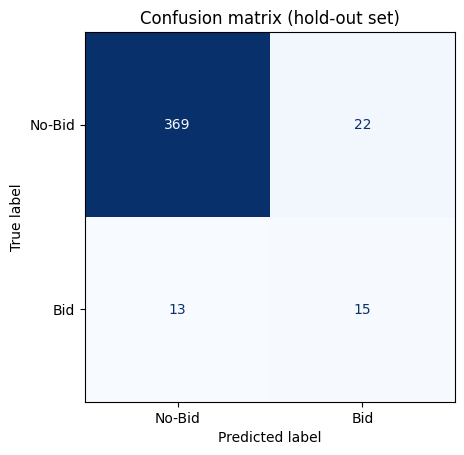

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    pipe, X_test, y_test,
    display_labels=["No-Bid", "Bid"],
    cmap="Blues", colorbar=False
)
plt.title("Confusion matrix (hold-out set)")
plt.show()